# Data Preprocessing and Model Performance Comparison with Lazypredict

##  Load and explore the dataset

In [56]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [57]:
# Import csv file and save into data
data=pd.read_csv('../data/raw/2022_train.csv')

In [58]:
# Display the first 5 rows of data and all the columns
pd.set_option('max_columns', None)
data.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.30,7.80,3.00,6.40,45.70,0.10,0.30,22.60,2.00,2.90,72.10,2.20,2.00,3.80,3.20,1.10,0.20,1.60,1
1,3800,75,21.80,10.50,4.20,7.90,55.10,-0.30,-1.00,34.90,2.40,3.60,67.80,3.60,3.70,6.60,0.70,0.50,0.60,1.40,1
2,3801,85,19.10,4.50,1.90,4.50,42.80,0.40,1.20,34.30,0.40,0.60,75.70,0.60,1.80,2.40,0.80,0.40,0.20,0.60,1
3,3802,63,19.10,8.20,3.50,6.70,52.50,0.30,0.80,23.70,0.90,1.50,66.90,0.80,2.00,3.00,1.80,0.40,0.10,1.90,1
4,3803,63,17.80,3.70,1.70,3.40,50.80,0.50,1.40,13.70,0.20,0.50,54.00,2.40,2.70,4.90,0.40,0.40,0.60,0.70,1


In [59]:
# Display the summary of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

Based on the summary above, none of the columns in dataframe has missing values.

In [60]:
# Display the dimensions(shape) of data
data.shape

(8000, 21)

In [61]:
# Display the descriptive statistics
data.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00
mean,7798.50,62.78,18.58,7.27,2.81,6.23,44.61,0.26,0.82,19.58,1.39,1.95,71.37,1.08,2.17,3.25,1.62,0.65,0.25,1.26,0.83
std,2309.55,17.12,8.94,4.32,1.69,3.58,6.16,0.38,1.06,16.00,0.93,1.25,10.43,0.79,1.39,2.09,1.36,0.41,0.82,0.72,0.37
min,3799.00,-8.00,2.90,0.80,0.30,0.80,21.30,-1.10,-3.10,-38.50,0.00,0.00,-13.30,0.00,0.20,0.30,0.00,0.00,-17.90,0.10,0.00
25%,5798.75,51.00,12.00,4.10,1.60,3.60,40.40,0.00,0.10,8.40,0.70,1.00,65.00,0.50,1.10,1.70,0.70,0.30,0.10,0.70,1.00
50%,7798.50,63.00,16.80,6.30,2.40,5.40,44.40,0.30,0.80,19.50,1.20,1.70,71.40,0.90,1.90,2.80,1.30,0.60,0.20,1.10,1.00
75%,9798.25,74.00,23.50,9.50,3.70,8.10,48.70,0.50,1.50,30.60,1.90,2.60,77.50,1.50,2.90,4.30,2.20,0.90,0.40,1.60,1.00
max,11798.00,123.00,73.80,34.20,13.10,28.90,67.20,1.70,4.70,82.10,8.10,11.10,168.90,5.50,11.00,15.90,12.80,3.60,18.90,5.30,1.00


**Unreasonable data based on descriptive summary**
- Games played cannot be negative
- 3P, 3PA and 3P% Made cannot be negative
- FT% can not be negative and cannot be over 100%
- BLK can not be negative

In [62]:
# Count the number of records in two classes
data['TARGET_5Yrs'].value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

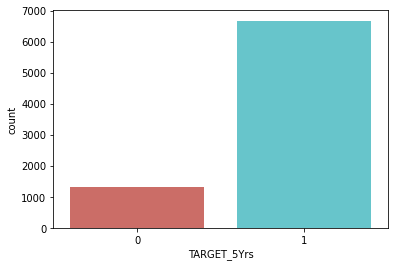

In [111]:

# Display the counts of target value
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='TARGET_5Yrs', data=data, palette='hls')
plt.show()

##  Split Train and Test Sets for Raw Data

In [63]:
# Create a copy of data and save it into a variable data_cleaned
data_cleaned=data.copy()

In [64]:
# Remove the id column
data_cleaned.drop('Id',axis=1,inplace=True)

In [65]:
# Extract the column 'TARGET_5Yrs' and save it into variable called target
target=data_cleaned.pop('TARGET_5Yrs')

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Import function scaler_split_train_test from data.sets
import sys
sys.path.insert(1, '..')
from src.data.sets import split_train_test

In [68]:
# del sys.path[1]
# sys.path

In [69]:
# Split the scaler data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val=split_train_test(df=data_cleaned,target=target,test_ratio=0.2)

In [70]:
# Import the function save_sets from sets and save the sets into the folder data/processed
from src.data.sets import save_sets
save_sets(X_train, y_train, X_val, y_val, path='../data/processed/')

In [71]:
# Import the function load_sets from sets and load the sets from data/processed
from src.data.sets import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../data/processed/')

## Baseline Model

In [72]:
# Import statistics
from statistics import mode

In [73]:
# Find the mode of the target variable from the training set
y_mode=mode(y_train)

In [74]:
# Create a numpy array called y_base of dimensions (len(y_train), 1) filled with the mode value
y_base=np.full((len(y_train),1),y_mode)

In [75]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
from src.models.performance import print_class_perf

print_class_perf(y_train,y_base,set_name='Training')

ROC AUC Score Training: 0.5


## Classification Models Comparison

In [76]:
# Import lazypredict package
import lazypredict

In [77]:
# Import LazyClassifier from lazypredict.Supervised
from lazypredict.Supervised import LazyClassifier

In [78]:
# Fit the Lazyclassifier model based on train set and predict the validation set
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=8)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:15<00:00,  1.91it/s]


In [79]:
# Display all the rows
pd.set_option('display.max_rows', None)

In [80]:
# Print the metrics for different classifiers
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.58,0.63,0.69,0.64,0.02
BernoulliNB,0.64,0.63,0.68,0.68,0.03
QuadraticDiscriminantAnalysis,0.77,0.60,0.67,0.77,0.03
DecisionTreeClassifier,0.75,0.56,0.56,0.76,0.09
ExtraTreeClassifier,0.74,0.55,0.55,0.75,0.02
KNeighborsClassifier,0.82,0.54,0.61,0.78,0.19
BaggingClassifier,0.81,0.54,0.62,0.78,0.50
LabelSpreading,0.75,0.54,0.63,0.75,3.89
LabelPropagation,0.75,0.53,0.62,0.75,2.58


In [81]:
#  Import dump from joblib and save the fitted model into the folder models as a file called lazypredict_raw
from joblib import dump 

dump(clf,  '../models/lazypredict_raw.joblib')

['../models/lazypredict_raw.joblib']

## Data Preprocessing - Dropping Outliers

In [82]:
# Create a copy of data and save it into a variable data_cleaned
data_cleaned=data.copy()

In [83]:
# Remove the id column
data_cleaned.drop('Id',axis=1,inplace=True)

In [84]:
# Check the number of rows where Games played are below or equal to 0
len(data_cleaned[(data_cleaned['GP']<=0)])

2

In [85]:
# Considering the small number, remove the 2 records when the column Games played is negative
data_cleaned.drop(data_cleaned[data_cleaned['GP']<=0].index,inplace=True)

# Method 2
# data_cleaned=data_cleaned[(data_cleaned['GP']>0)]

In [86]:
# Check the number of rows where the columns of 3P Made, 3PA and 3P% are negative
print(f"There are {len(data_cleaned[data_cleaned['3P Made']<0])} rows where '3P Made' column is negative.")
print(f"There are {len(data_cleaned[data_cleaned['3PA']<0])} rows where '3PA' column is negative.")
print(f"There are {len(data_cleaned[data_cleaned['3P%']<0])} rows where '3P%' column is negative.")

There are 1628 rows where '3P Made' column is negative.
There are 1657 rows where '3PA' column is negative.
There are 878 rows where '3P%' column is negative.


In [87]:
# Considering the significant number of rows, the columns of '3P Made', '3PA' and '3P%' are removed from the dataset
data_cleaned.drop(['3P Made','3PA','3P%'],axis=1,inplace=True)

In [88]:
# Check the number of rows where FT% is negative or over 100%
print(f"There are {len(data_cleaned[data_cleaned['FT%']<0])} rows where 'FT%' column is negative.")
print(f"There are {len(data_cleaned[data_cleaned['FT%']>100])} rows where 'FT%' column is over 100%.")

There are 1 rows where 'FT%' column is negative.
There are 58 rows where 'FT%' column is over 100%.


In [89]:
# Considering the small number, remove the records that FT% is negative or over 100%
data_cleaned.drop(data_cleaned[(data_cleaned['FT%']<0)|(data_cleaned['FT%']>100)].index,inplace=True)

# Method 2
# data_cleaned=data_cleaned[(data_cleaned['FT%']>=0)&(data_cleaned['FT%']<=100)]

In [90]:
# Check the number of rows where BLK is negative
print(f"There are {len(data_cleaned[data_cleaned['BLK']<0])} rows where 'BLK' column is negative.")

There are 1029 rows where 'BLK' column is negative.


In [91]:
# Considering the significant number of rows, the column of 'BLK' is removed from the dataset
data_cleaned.drop(['BLK'],axis=1,inplace=True)

In [92]:
# Check the whether there are duplicate rows
sum(data_cleaned.duplicated())

0

In [93]:
# Display number of rows and columns after data cleansing
data_cleaned.shape

(7939, 16)

## Feature Engineering

In [94]:
# Add the columns 'TOTAL_MIN','TOTAL_PTS' and 'FG/FT'
data_cleaned['TOTAL_MIN']=data_cleaned['MIN'] * data_cleaned['GP']
data_cleaned['TOTAL_PTS']=data_cleaned['PTS'] * data_cleaned['GP']
data_cleaned['FG/FT']=data_cleaned['FG%']/data_cleaned['FT%']

In [95]:
# Display number of rows and columns after data cleansing
data_cleaned.shape

(7939, 19)

In [96]:
data_cleaned.head()

,GP,MIN,PTS,FGM,FGA,FG%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,TOV,TARGET_5Yrs,TOTAL_MIN,TOTAL_PTS,FG/FT
0,80,24.30,7.80,3.00,6.40,45.70,2.00,2.90,72.10,2.20,2.00,3.80,3.20,1.10,1.60,1,1944.00,624.00,0.63
1,75,21.80,10.50,4.20,7.90,55.10,2.40,3.60,67.80,3.60,3.70,6.60,0.70,0.50,1.40,1,1635.00,787.50,0.81
2,85,19.10,4.50,1.90,4.50,42.80,0.40,0.60,75.70,0.60,1.80,2.40,0.80,0.40,0.60,1,1623.50,382.50,0.57
3,63,19.10,8.20,3.50,6.70,52.50,0.90,1.50,66.90,0.80,2.00,3.00,1.80,0.40,1.90,1,1203.30,516.60,0.78
4,63,17.80,3.70,1.70,3.40,50.80,0.20,0.50,54.00,2.40,2.70,4.90,0.40,0.40,0.70,1,1121.40,233.10,0.94


## Data Preparation

In [97]:
# Extract the column 'TARGET_5Yrs' and save it into variable called target
target=data_cleaned.pop('TARGET_5Yrs')

In [98]:
# Import StandardScaler from sklearn.preprocessing and instantiate the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [99]:
# Fit and apply the scaling on data_cleaned
data_cleaned=scaler.fit_transform(data_cleaned)

In [100]:
# Import dump from joblib and save the scaler into the folder models and call the file scaler.joblib
from joblib import dump

dump(scaler, '../models/scaler_dropped_fe.joblib')

['../models/scaler_dropped_fe.joblib']

In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# Import function scaler_split_train_test from data.sets
import sys
sys.path.insert(1, '..')
from src.data.sets import split_train_test

In [103]:
# Split the scaler data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val=split_train_test(df=data_cleaned,target=target,test_ratio=0.2)

In [104]:
# Import the function save_sets from sets and save the sets into the folder data/processed
from src.data.sets import save_sets
save_sets(X_train, y_train, X_val, y_val, path='../data/processed/')

In [105]:
# Import the function load_sets from sets and load the sets from data/processed
from src.data.sets import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../data/processed/')

## Classification Models Comparison with Cleaned Data

In [106]:
# Import lazypredict package
import lazypredict

In [107]:
# Import LazyClassifier from lazypredict.Supervised
from lazypredict.Supervised import LazyClassifier

In [108]:
# Fit the Lazyclassifier model based on train set and predict the validation set
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:14<00:00,  1.95it/s]


In [109]:
# Print the metrics of classifiers
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.61,0.63,0.69,0.66,0.04
BernoulliNB,0.63,0.63,0.68,0.68,0.02
GaussianNB,0.54,0.61,0.69,0.60,0.02
LabelPropagation,0.76,0.54,NaN,0.76,2.22
KNeighborsClassifier,0.82,0.54,0.59,0.79,0.17
LabelSpreading,0.76,0.54,NaN,0.76,3.40
ExtraTreeClassifier,0.74,0.54,0.54,0.75,0.02
DecisionTreeClassifier,0.73,0.54,0.54,0.74,0.10
XGBClassifier,0.83,0.53,0.66,0.79,0.79


In [110]:
#  Import dump from joblib and save the fitted model into the folder models as a file called lazypredict_cleaned
from joblib import dump 

dump(clf,  '../models/lazypredict_dropped_fe.joblib')

['../models/lazypredict_dropped_fe.joblib']